In [63]:
# Import Required Library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exzatech01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# load the dataset of SMS messages
df = pd.read_table('SMSSPamCollection', header=None, encoding='utf-8')

In [65]:
# print useful information about the dataset
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
0    5572 non-null object
1    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [66]:
df.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [67]:
df.columns

Int64Index([0, 1], dtype='int64')

In [72]:
# Rename of Columns from 0,1 to type,sms for better understanding
df.columns = ['type','sms']

In [73]:
#Check if the column rename completed
df.columns

Index(['type', 'sms'], dtype='object')

In [74]:
#check the header data after column rename
df.head(5)

,type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
df.groupby('type').describe()

sms                                                               
     count unique                                                top freq
type                                                                     
ham   4516   4516  Wen u miss someone, the person is definitely s...    1
spam   653    653  Did you hear about the new "Divorce Barbie"? I...    1

In [91]:
df['length'] = df['sms'].map(lambda text: len(text))
df.head()

,type,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


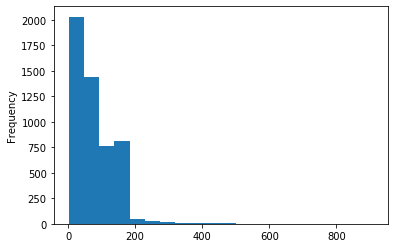

In [92]:
df.length.plot(bins=20, kind='hist')

In [93]:
df.length.describe()

count    5169.000000
mean       79.344554
std        58.437457
min         2.000000
25%        36.000000
50%        61.000000
75%       119.000000
max       910.000000
Name: length, dtype: float64

In [102]:
#What is that super long message?

list(df.message[df.length > 900])

AttributeError: 'DataFrame' object has no attribute 'message'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DB00B8648>,
      dtype=object)

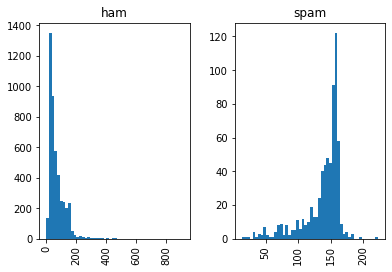

In [97]:
# Is there any difference in message length between spam and ham?
df.hist(column='length', by='type', bins=50)

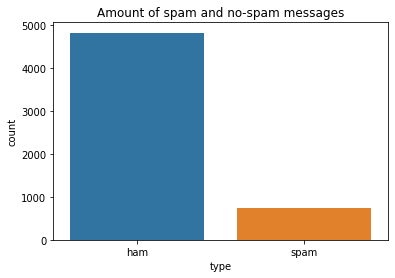

In [75]:
#compare the types of HAM (non SPAM) vs SPAM
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [76]:
# count number of records
df.shape


(5572, 2)

In [77]:
# check and remove duplicate
df.drop_duplicates(inplace=True)


In [78]:
# check after duplicate remove 
df.shape

(5169, 2)

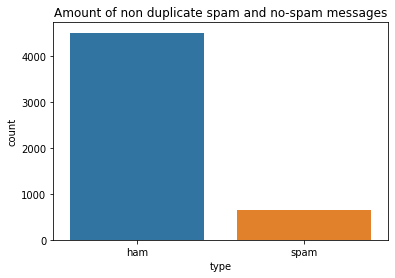

In [79]:
#compare the types of HAM (non SPAM) vs SPAM after duplicate removal
sns.countplot(data = df, x= df["type"]).set_title("Amount of non duplicate spam and no-spam messages")
plt.show()

In [81]:
# Find for missing data
df.isnull().sum()

type    0
sms     0
dtype: int64

In [82]:
df["type"].value_counts()

ham     4516
spam     653
Name: type, dtype: int64

In [83]:
#converting categorical data in numeric labels
# 0=ham,1=spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
classes=df["type"]
Y=encoder.fit_transform(classes)

In [40]:
text_messages=df["sms"]
text_messages.sample(5)

2337    Aww you must be nearly dead!Well Jez isComing ...
4842    Hmmm.... Mayb can try e shoppin area one, but ...
5209    I know you are thinkin malaria. But relax, chi...
2080                          I can take you at like noon
4840    That's one of the issues but california is oka...
Name: sms, dtype: object

In [41]:
# using regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replacing email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replacing URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replacing money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymbol')
    
# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replacing numbers with 'number'
processed = processed.str.replace(r'\d+(\.\d+)?', 'number')

# Removing punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [42]:
# changing words to lower case - Ex-Prashant,prashAnt -> prashant
processed = processed.str.lower()
processed.sample(5)

3691                             what happen dear tell me
1469    hi its lucy hubby at meetins all day fri i wil...
1211        guessin you ain t gonna be here before number
1305       your right i ll make the appointment right now
2768                 wow v v impressed have funs shopping
Name: sms, dtype: object

In [52]:
# removing stop words from text messages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
set(stopwords.words('english'))
    
stop_words = set(stopwords.words('english'))
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [53]:
# Removing word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [54]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [55]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [56]:
>>> nltk.download('stopwords')

from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exzatech01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:

# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [61]:
print (processed)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri number wkli comp win fa cup final t...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbernd time tri number contact u u moneysymb...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object
